# **Especificamos el entorno**

In [1]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

# **Cargamos los datos**

In [3]:
# Función para eliminar la carpeta si existe y crear una nueva
def reset_data_directory(path):
  if path.exists():
    print(f"Eliminando la carpeta existente: {path}")
    shutil.rmtree(path)
  path.mkdir(parents=True, exist_ok=True)
  print(f"Creada la nueva carpeta: {path}")

In [4]:
from google.colab import drive
import shutil
from pathlib import Path

drive.mount('/content/drive')
dataset_path = Path('/content/drive/MyDrive/TFG/image_original_fashion_mnist')


Mounted at /content/drive


In [ ]:
import shutil
from pathlib import Path
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

# Si el dataset ya existe, se elimina para actualizarlo
if dataset_path.exists():
  shutil.rmtree(dataset_path)

try:
  train_dataset = FashionMNIST(root=str(dataset_path), train=True, download=True, transform=ToTensor())
  test_dataset  = FashionMNIST(root=str(dataset_path), train=False, download=True, transform=ToTensor())
  print("Dataset descargado y cargado con éxito.")
except Exception as e:
  print(f"Error al descargar el dataset: {e}")


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.7MB/s]


Extracting /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 206kB/s]


Extracting /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.98MB/s]


Extracting /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.2MB/s]


Extracting /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw

Dataset descargado y cargado con éxito.


In [ ]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=69b258fba7cab2bd95f5fef7b3b57c64e8f5fba45885f756781a2a2235710291
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [ ]:
import idx2numpy
from pathlib import Path
from PIL import Image
import shutil

# Definir rutas
idx_path = Path("/content/drive/MyDrive/TFG/image_original_fashion_mnist/FashionMNIST/raw")

train_images_file = idx_path / 'train-images-idx3-ubyte'
train_labels_file = idx_path / 'train-labels-idx1-ubyte'
test_images_file  = idx_path / 't10k-images-idx3-ubyte'
test_labels_file  = idx_path / 't10k-labels-idx1-ubyte'

# Convertir los archivos IDX en arrays de NumPy
train_images = idx2numpy.convert_from_file(str(train_images_file))
train_labels = idx2numpy.convert_from_file(str(train_labels_file))
test_images  = idx2numpy.convert_from_file(str(test_images_file))
test_labels  = idx2numpy.convert_from_file(str(test_labels_file))

# Definir los nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Reemplazamos caracteres problemáticos y ponemos en minúsculas
class_names = [name.replace('/', '_').replace(' ', '_').lower() for name in class_names]

# Definir la ruta de salida para las imágenes organizadas
output_path = Path("/content/drive/MyDrive/TFG/image_original_fashionMNIST")
train_dir = output_path / "train"
test_dir = output_path / "test"

if output_path.exists():
  shutil.rmtree(output_path)

for split in [train_dir, test_dir]:
  for cls in class_names:
    (split / cls).mkdir(parents=True, exist_ok=True)

# Guardar las imágenes
#print("Guardando.....")
for i, (img_arr, label) in enumerate(zip(train_images, train_labels)):
  img = Image.fromarray(img_arr)
  label_str = class_names[label]
  file_path = train_dir / label_str / f"train_{i}.png"
  img.save(file_path)

for i, (img_arr, label) in enumerate(zip(test_images, test_labels)):
  img = Image.fromarray(img_arr)
  label_str = class_names[label]
  file_path = test_dir / label_str / f"test_{i}.png"
  img.save(file_path)

#print("IMAGENN GUARDADOS")


Cargando arrays de imágenes y etiquetas...
Arrays cargados correctamente.
Guardando imágenes de entrenamiento...
Guardando imágenes de prueba...
¡Imágenes guardadas correctamente en: /content/drive/MyDrive/TFG/image_original_fashionMNIST !


In [6]:
output_path = Path("/content/drive/MyDrive/TFG/image_original_fashionMNIST")

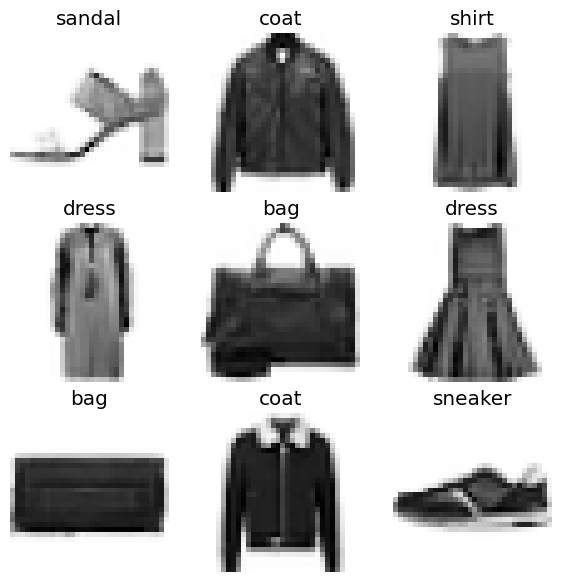

In [7]:
# Crear los DataLoaders
blocks = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(32),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

# Crear los DataLoaders
dls = blocks.dataloaders(output_path/'train', bs=256)

# Mostrar una muestra de las imágenes para verificar la correcta organización
dls.show_batch(max_n=9, figsize=(7,7))


In [ ]:
!ls /content/drive/MyDrive/TFG/image_original_fashionMNIST/train/

ankle_boot  bag  coat  dress  pullover	sandal	shirt  sneaker	trouser  t-shirt_top


In [ ]:
# Obtener el número total de imágenes
num_train = len(dls.train_ds)
num_valid = len(dls.valid_ds)

print(f"Número total de imágenes en entrenamiento: {num_train}")
print(f"Número total de imágenes en validación: {num_valid}")

# Obtener la distribución de clases
class_counts = dls.train_ds.vocab  # Obtiene las clases
print("\nClases:", class_counts)

Número total de imágenes en entrenamiento: 48000
Número total de imágenes en validación: 12000

Clases: ['ankle_boot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 't-shirt_top', 'trouser']


In [ ]:
# Para obtener el número de imágenes por clase, podemos usar Fastai con Pandas
import pandas as pd

# Crear un DataFrame con las etiquetas de entrenamiento
train_labels = pd.Series(dls.train_ds.items).apply(lambda x: Path(x).parent.name)

# Contar las ocurrencias por clase
train_counts = train_labels.value_counts().sort_index()

print("\nNúmero de imágenes por clase en entrenamiento:")
print(train_counts)

# Hacer lo mismo para el conjunto de validación
valid_labels = pd.Series(dls.valid_ds.items).apply(lambda x: Path(x).parent.name)
valid_counts = valid_labels.value_counts().sort_index()

print("\nNúmero de imágenes por clase en validación:")
print(valid_counts)


Número de imágenes por clase en entrenamiento:
ankle_boot     4789
bag            4809
coat           4763
dress          4835
pullover       4829
sandal         4802
shirt          4747
sneaker        4783
t-shirt_top    4809
trouser        4834
Name: count, dtype: int64

Número de imágenes por clase en validación:
ankle_boot     1211
bag            1191
coat           1237
dress          1165
pullover       1171
sandal         1198
shirt          1253
sneaker        1217
t-shirt_top    1191
trouser        1166
Name: count, dtype: int64


### Original dataset - Lenet

In [8]:
class LeNet(nn.Module):
  def __init__(self, num_classes=10):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5)   # Entrada: 1 canal, Salida: 6 filtros
    self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, num_classes)

  def forward(self, x):
    x = torch.tanh(self.conv1(x))
    x = self.pool(x)
    x = torch.tanh(self.conv2(x))
    x = self.pool(x)
    x = x.view(x.size(0), -1)  # Aplanar la salida
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    x = self.fc3(x)
    return x

In [12]:
# Instanciar el modelo
model = LeNet(num_classes=10)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, Recall(average='macro'), F1Score(average='macro')], cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3)])


In [10]:
learn.summary()

LeNet (Input shape: 256 x 1 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     256 x 6 x 28 x 28   
Conv2d                                    156        True      
____________________________________________________________________________
                     256 x 16 x 5 x 5    
AvgPool2d                                                      
____________________________________________________________________________
                     256 x 16 x 10 x 10  
Conv2d                                    2416       True      
____________________________________________________________________________
                     256 x 120           
Linear                                    48120      True      
____________________________________________________________________________
                     256 x 84            
Linear                                    10164      True      
___________________________________________________________

In [ ]:
start_time = time.time()
learn.fit_one_cycle(30)
end_time = time.time()

print(f"\nTiempo de entrenamiento: {end_time - start_time:.2f} segundos")

epoch,train_loss,valid_loss,accuracy,recall_score,f1_score,time


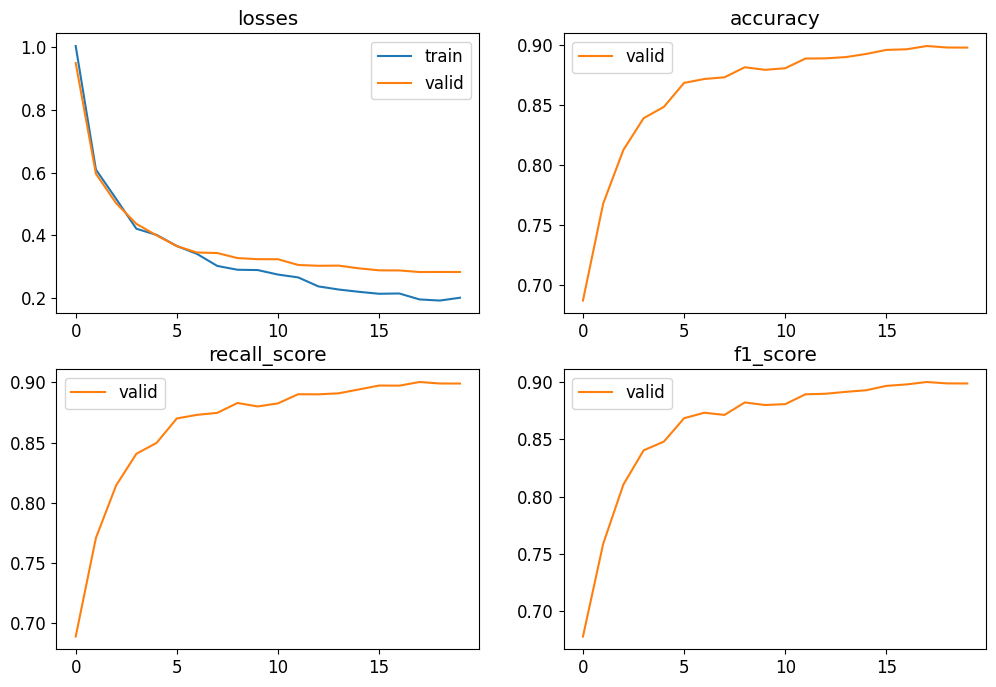

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
loss, acc, recall, f1 = learn.validate()

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc:.4f}')
print(f"Recall: {recall:.4f}")
print(f'F1-Score: {f1:.4f}')

Loss: 0.2827
Accuracy: 0.8981
Recall: 0.8991
F1-Score: 0.8987


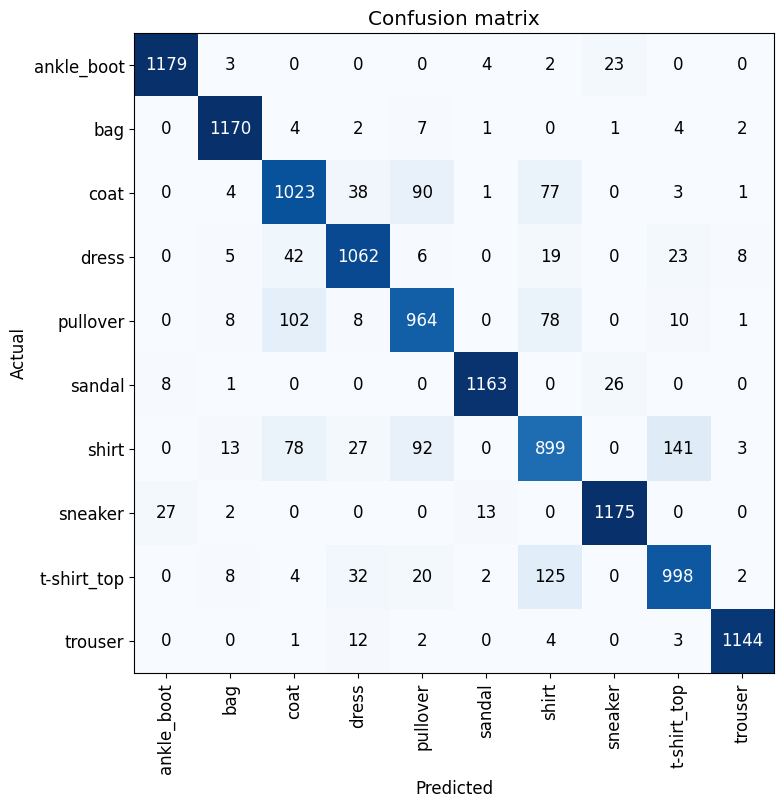

In [ ]:
#Creamos la interpretación de nuestro learner
interp = ClassificationInterpretation.from_learner(learn)

#Visualizamos la matriz de confusión
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


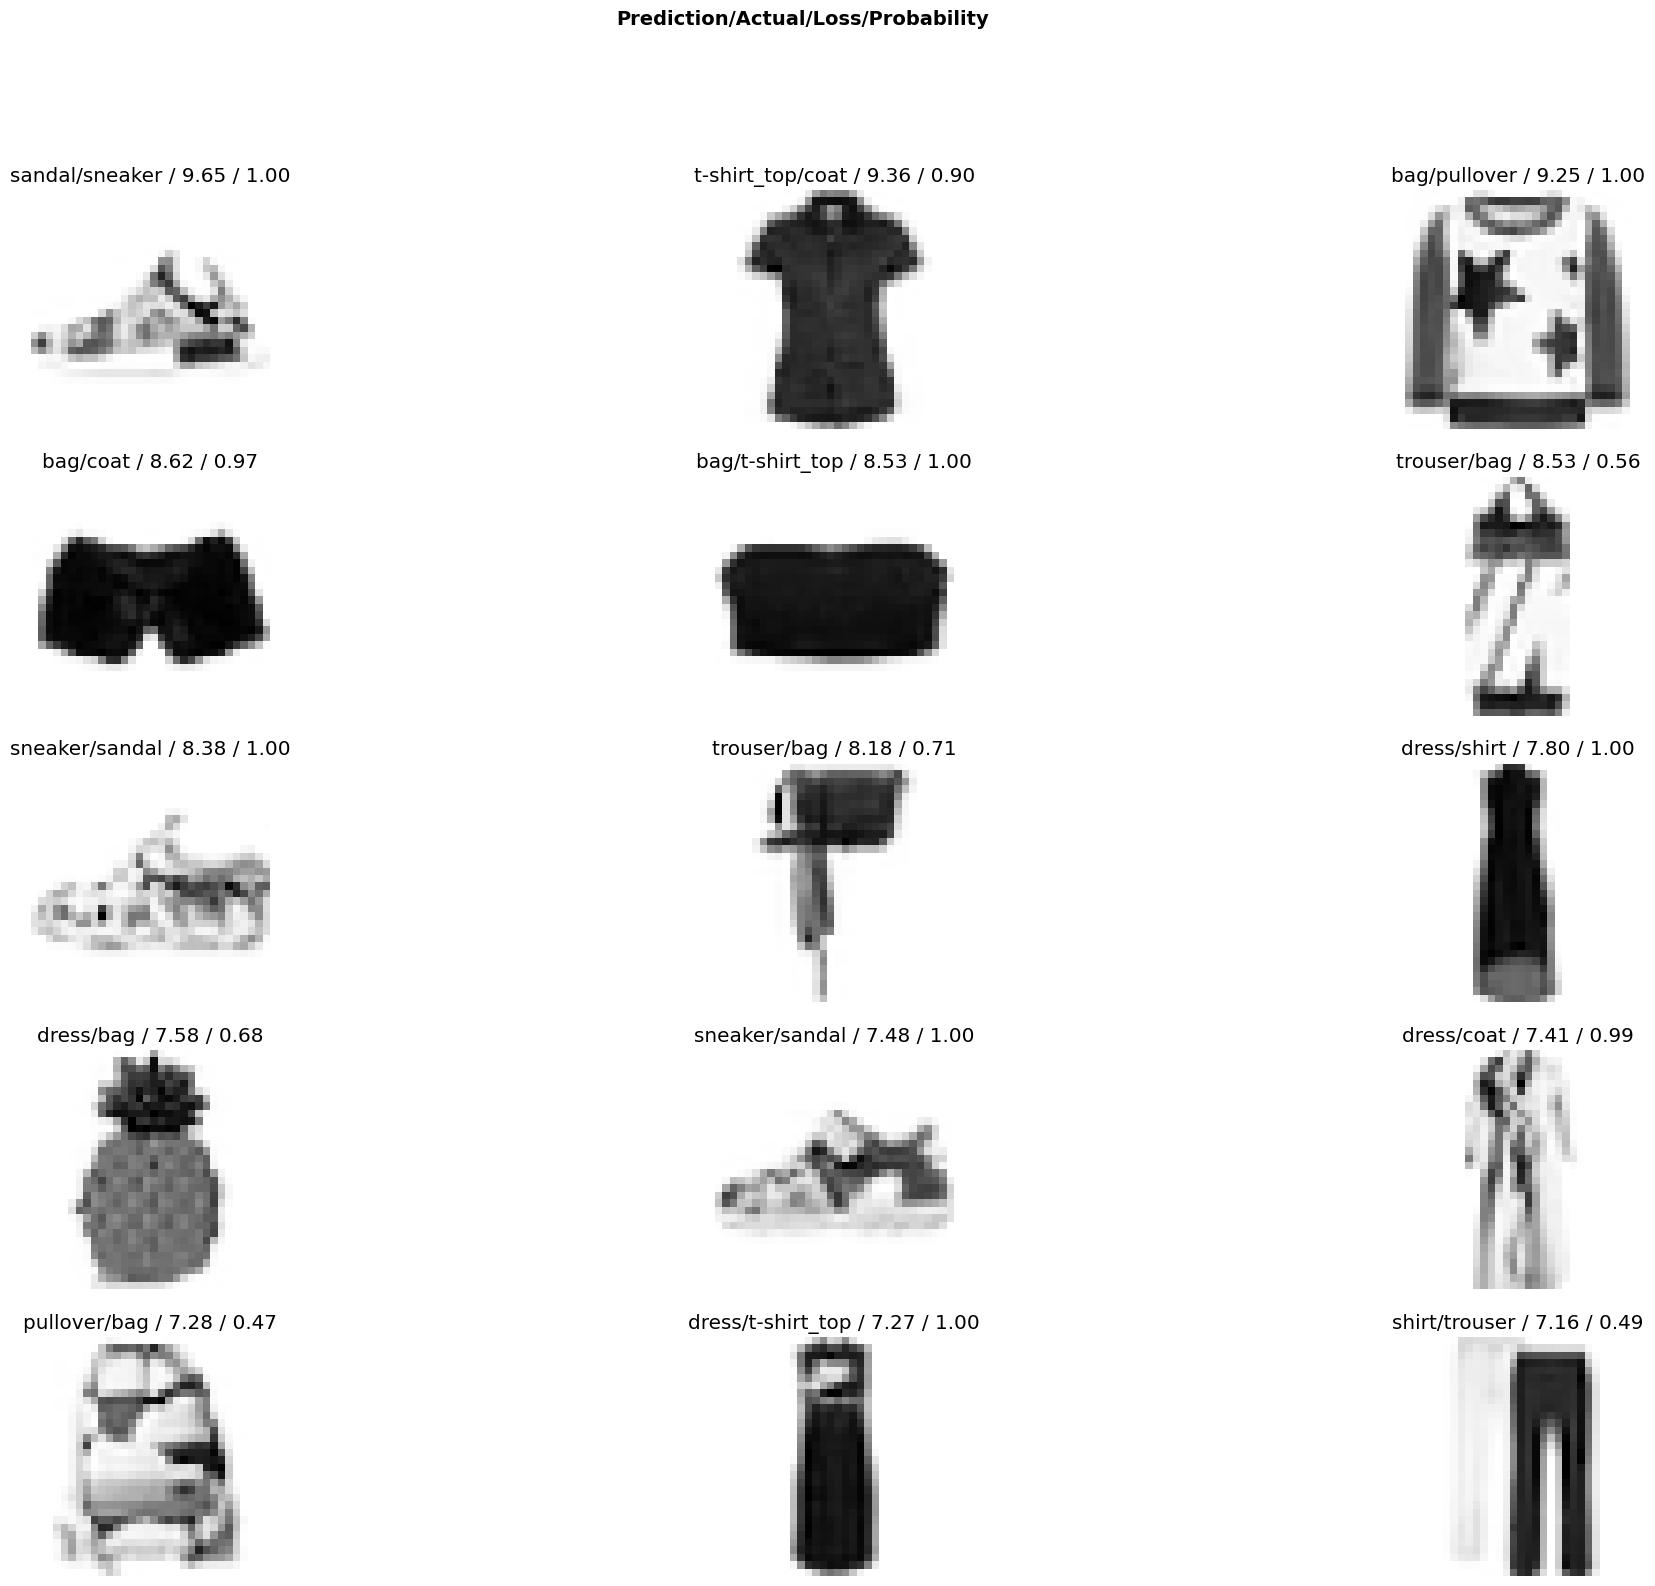

In [ ]:
interp.plot_top_losses(15, nrows=5, figsize=(25,18))

In [ ]:
learn.export('/content/drive/MyDrive/TFG/modelos/lenet_original.pkl')

### Original dataset - Resnet18

In [ ]:
output_path = Path("/content/drive/MyDrive/TFG/image_original_fashionMNIST")

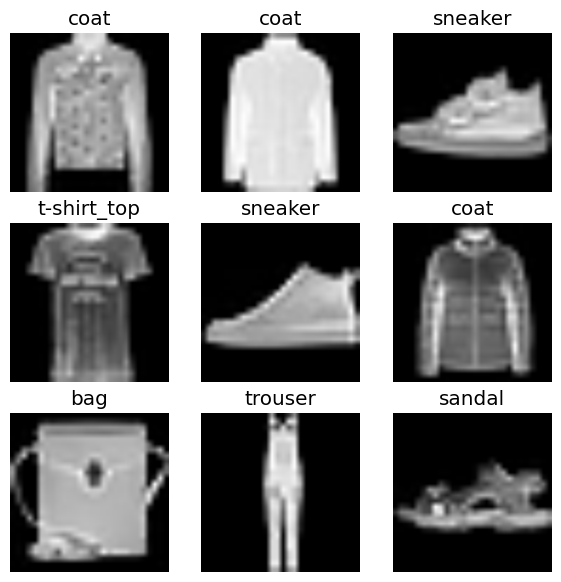

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # 80% entrenamiento y 20% validación
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Crear los DataLoaders
dls = dblock.dataloaders(output_path/'train', bs=256)

# Mostrar una muestra de las imágenes para verificar la correcta organización
dls.show_batch(max_n=9, figsize=(7,7))

In [ ]:
from torchvision.models import resnet18

learn = vision_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, Recall(average='macro'), F1Score(average='macro')], pretrained=True, cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3)])


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 56.5MB/s]


In [ ]:
learn.summary()

Sequential (Input shape: 256 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     256 x 64 x 112 x 11 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     256 x 64 x 56 x 56  
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                     

In [ ]:
start_time = time.time()
learn.fine_tune(10)
end_time = time.time()

print(f"\nTiempo de entrenamiento: {end_time - start_time:.2f} segundos")

epoch,train_loss,valid_loss,accuracy,recall_score,f1_score,time


KeyboardInterrupt: 

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
loss, acc, recall, f1 = learn.validate()

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {acc:.4f}')
print(f"Recall: {recall:.4f}")
print(f'F1-Score: {f1:.4f}')

In [ ]:
#Creamos la interpretación de nuestro learner
interp = ClassificationInterpretation.from_learner(learn)

#Visualizamos la matriz de confusión
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

In [ ]:
interp.plot_top_losses(15, nrows=5, figsize=(25,18))

In [ ]:
learn.export('/content/drive/MyDrive/TFG/modelos/resnet18_fashionMNIST.pkl')

## Distilled dataset

In [ ]:
output_path = Path("/content/drive/MyDrive/TFG/image_original_fashionMNIST")

In [ ]:
import random
import shutil
from pathlib import Path
import numpy as np
from PIL import Image

def media_arit(image_paths):
  avg_image = None
  count = 0

  # Recorrer cada imagen, convertirla a un array NumPy y sumarla
  for img_path in image_paths:
    with Image.open(img_path) as img:
      img = img.convert('L')  # Asegurarse de trabajar en RGB
      np_img = np.array(img, dtype=np.float32)
      if avg_image is None:
        avg_image = np_img
      else:
        avg_image += np_img
      count += 1

  # Calcular la media
  avg_image /= count
  avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)

  return Image.fromarray(avg_image, mode='L')


In [ ]:
def create_distilled_dataset(src_path, dst_path, fraction=0.2, mix_function=media_arit):
    src_path = Path(src_path)
    dst_path = Path(dst_path)

    # Si la carpeta destino existe, se elimina para crearla de nuevo
    if dst_path.exists():
        shutil.rmtree(dst_path)
    dst_path.mkdir(parents=True, exist_ok=True)

    # Iterar sobre cada conjunto (por ejemplo, train, test, etc.)
    for split_dir in src_path.iterdir():
        if not split_dir.is_dir():
            continue

        split_name = split_dir.name.lower()
        new_split_dir = dst_path / split_dir.name

        if split_name == "train":
            # Procesar el conjunto de entrenamiento: destilación (mezcla) por cada clase
            new_split_dir.mkdir(parents=True, exist_ok=True)
            for class_dir in split_dir.iterdir():
                if not class_dir.is_dir():
                    continue

                # Obtener la lista de imágenes de la clase
                images = list(class_dir.glob('*.*'))
                if len(images) == 0:
                    continue

                n_images = len(images)
                new_class_dir = new_split_dir / class_dir.name
                new_class_dir.mkdir(parents=True, exist_ok=True)

                # Procesado según la fracción
                if fraction == 0:  # No se modifica nada, se copian las imágenes originales
                    for img_path in images:
                        shutil.copy(img_path, new_class_dir)
                elif fraction == 1:  # Se mezcla todo en una sola imagen destilada
                    distilled_image = mix_function(images)
                    distilled_filename = new_class_dir / "distilled.jpg"
                    distilled_image.save(distilled_filename)
                else:
                    # Para fracciones entre 0 y 1 se agrupan todas las imágenes en grupos
                    group_size = max(1, int(n_images * fraction))

                    # Barajar las imágenes para obtener grupos aleatorios
                    random.shuffle(images)

                    group_count = 0
                    # Particionar la lista de imágenes en grupos de tamaño 'group_size'
                    for i in range(0, n_images, group_size):
                        group = images[i:i + group_size]
                        distilled_image = mix_function(group)
                        distilled_filename = new_class_dir / f"distilled_{group_count}.jpg"
                        distilled_image.save(distilled_filename)
                        group_count += 1

        elif split_name == "test":
            continue
        else:
            continue

In [ ]:
# Definir la ruta destino de nuestro dataset "destilado"
distilled_path = Path('/content/drive/MyDrive/TFG/image_distilled_fashion_mnist')

# Crear el subset destilado de train
create_distilled_dataset(output_path, distilled_path, fraction= 1)


In [ ]:
distilled_path = Path('/content/drive/MyDrive/TFG/image_distilled_fashion_mnist_01')
create_distilled_dataset(output_path, distilled_path, fraction= 0.1)

In [ ]:
distilled_path = Path('/content/drive/MyDrive/TFG/image_distilled_fashion_mnist_001')
create_distilled_dataset(output_path, distilled_path, fraction= 0.01)

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

def visualizar_imagenes_destiladas(dataset_dir, cols=3):
    dataset_dir = Path(dataset_dir)
    train_dir = dataset_dir / 'train'

    imagenes = []
    titulos = []

    # Recorrer cada carpeta de clase en 'train'
    for clase_dir in sorted(train_dir.iterdir()):
        if clase_dir.is_dir():
            img_path = clase_dir / "distilled.jpg"
            if img_path.exists():
                imagenes.append(Image.open(img_path))
                titulos.append(clase_dir.name)
            else:
                print(f"No se encontró 'distilled.jpg' en {clase_dir}")

    if not imagenes:
        print("No se encontraron imágenes destiladas para visualizar.")
        return

    # Calcular número de filas para el grid
    rows = (len(imagenes) + cols - 1) // cols

    # Crear la figura y ejes
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    # Si solo hay una fila o columna, axes podría no ser un array 2D
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1 or cols == 1:
        axes = list(axes)
    else:
        axes = axes.flatten()

    # Mostrar cada imagen en el subplot correspondiente
    for ax, img, titulo in zip(axes, imagenes, titulos):
        ax.imshow(img)
        ax.set_title(titulo)
        ax.axis("off")

    # Ocultar subplots vacíos
    for ax in axes[len(imagenes):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


### Distilled dataset - lenet

In [ ]:
distilled_path = Path('/content/drive/MyDrive/TFG/image_distilled_fashion_mnist_01')

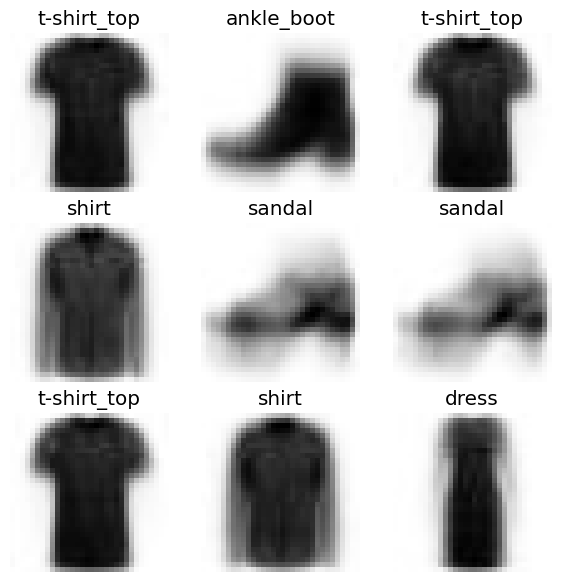

In [ ]:
# Crear los DataLoaders
blocks = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(32),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

# Crear los DataLoaders
#dls_dest = blocks.dataloaders(distilled_path/'train', bs=32)
dls_dest = blocks.dataloaders(distilled_path/'train', bs=64)
#dls_dest = blocks.dataloaders(distilled_path/'train', bs=128)

# Mostrar una muestra de las imágenes para verificar la correcta organización
dls_dest.show_batch(max_n=9, figsize=(7,7))


In [ ]:
# Obtener el número total de imágenes
num_train = len(dls_dest.train_ds)
num_valid = len(dls_dest.valid_ds)

print(f"Número total de imágenes en entrenamiento: {num_train}")
print(f"Número total de imágenes en validación: {num_valid}")

# Obtener la distribución de clases
class_counts = dls_dest.train_ds.vocab  # Obtiene las clases
print("\nClases:", class_counts)

Número total de imágenes en entrenamiento: 80
Número total de imágenes en validación: 20

Clases: ['ankle_boot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 't-shirt_top', 'trouser']


In [ ]:
# Instanciar el modelo
model = LeNet(num_classes=10)
# Crear el objeto learn
learn = Learner(dls_dest, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, Recall(average='macro'), F1Score(average='macro')], cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])


In [ ]:
start_time = time.time()
learn.fit_one_cycle(30)
end_time = time.time()

print(f"\nTiempo de entrenamiento: {end_time - start_time:.2f} segundos")

epoch,train_loss,valid_loss,accuracy,recall_score,f1_score,time
0,2.304561,2.267902,0.050000,0.142857,0.013605,00:00
1,2.305773,2.271332,0.050000,0.142857,0.013605,00:00
2,2.306014,2.278331,0.050000,0.142857,0.013605,00:00
3,2.305435,2.290599,0.150000,0.142857,0.045113,00:00
4,2.302293,2.304006,0.150000,0.142857,0.037267,00:00
5,2.298774,2.318486,0.150000,0.142857,0.037267,00:00


No improvement since epoch 0: early stopping

Tiempo de entrenamiento: 4.64 segundos


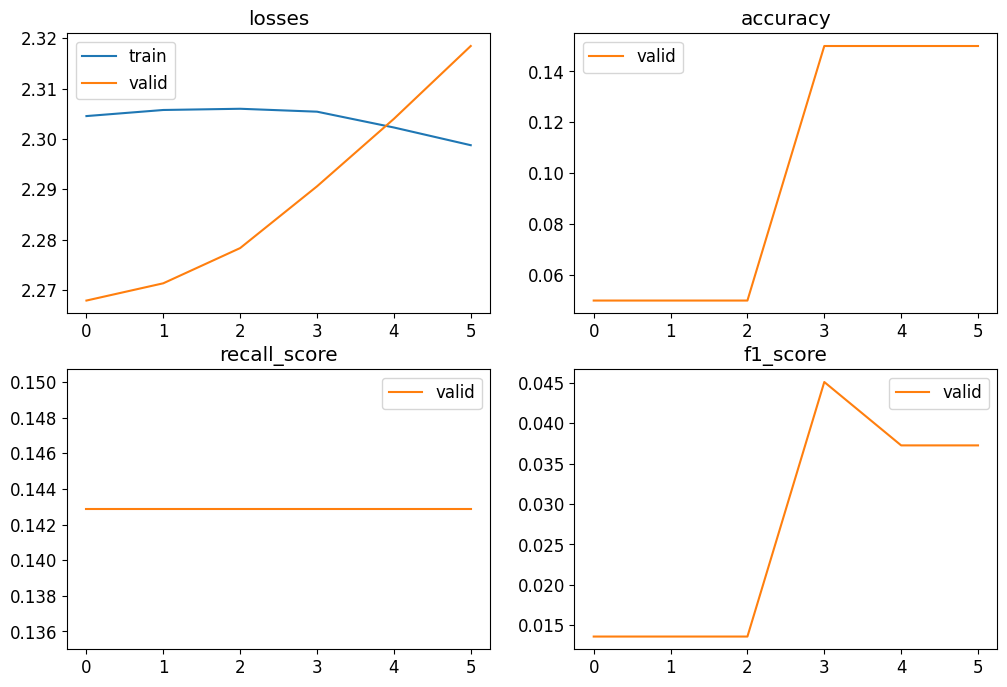

In [ ]:
learn.recorder.plot_metrics()

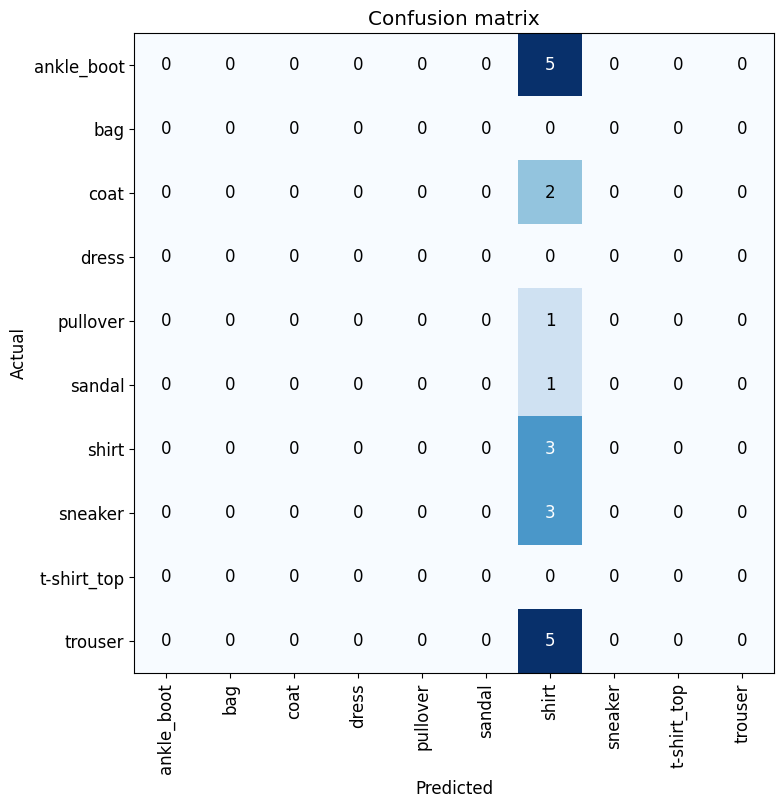

In [ ]:
#Creamos la interpretación de nuestro learner
interp = ClassificationInterpretation.from_learner(learn)

#Visualizamos la matriz de confusión
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


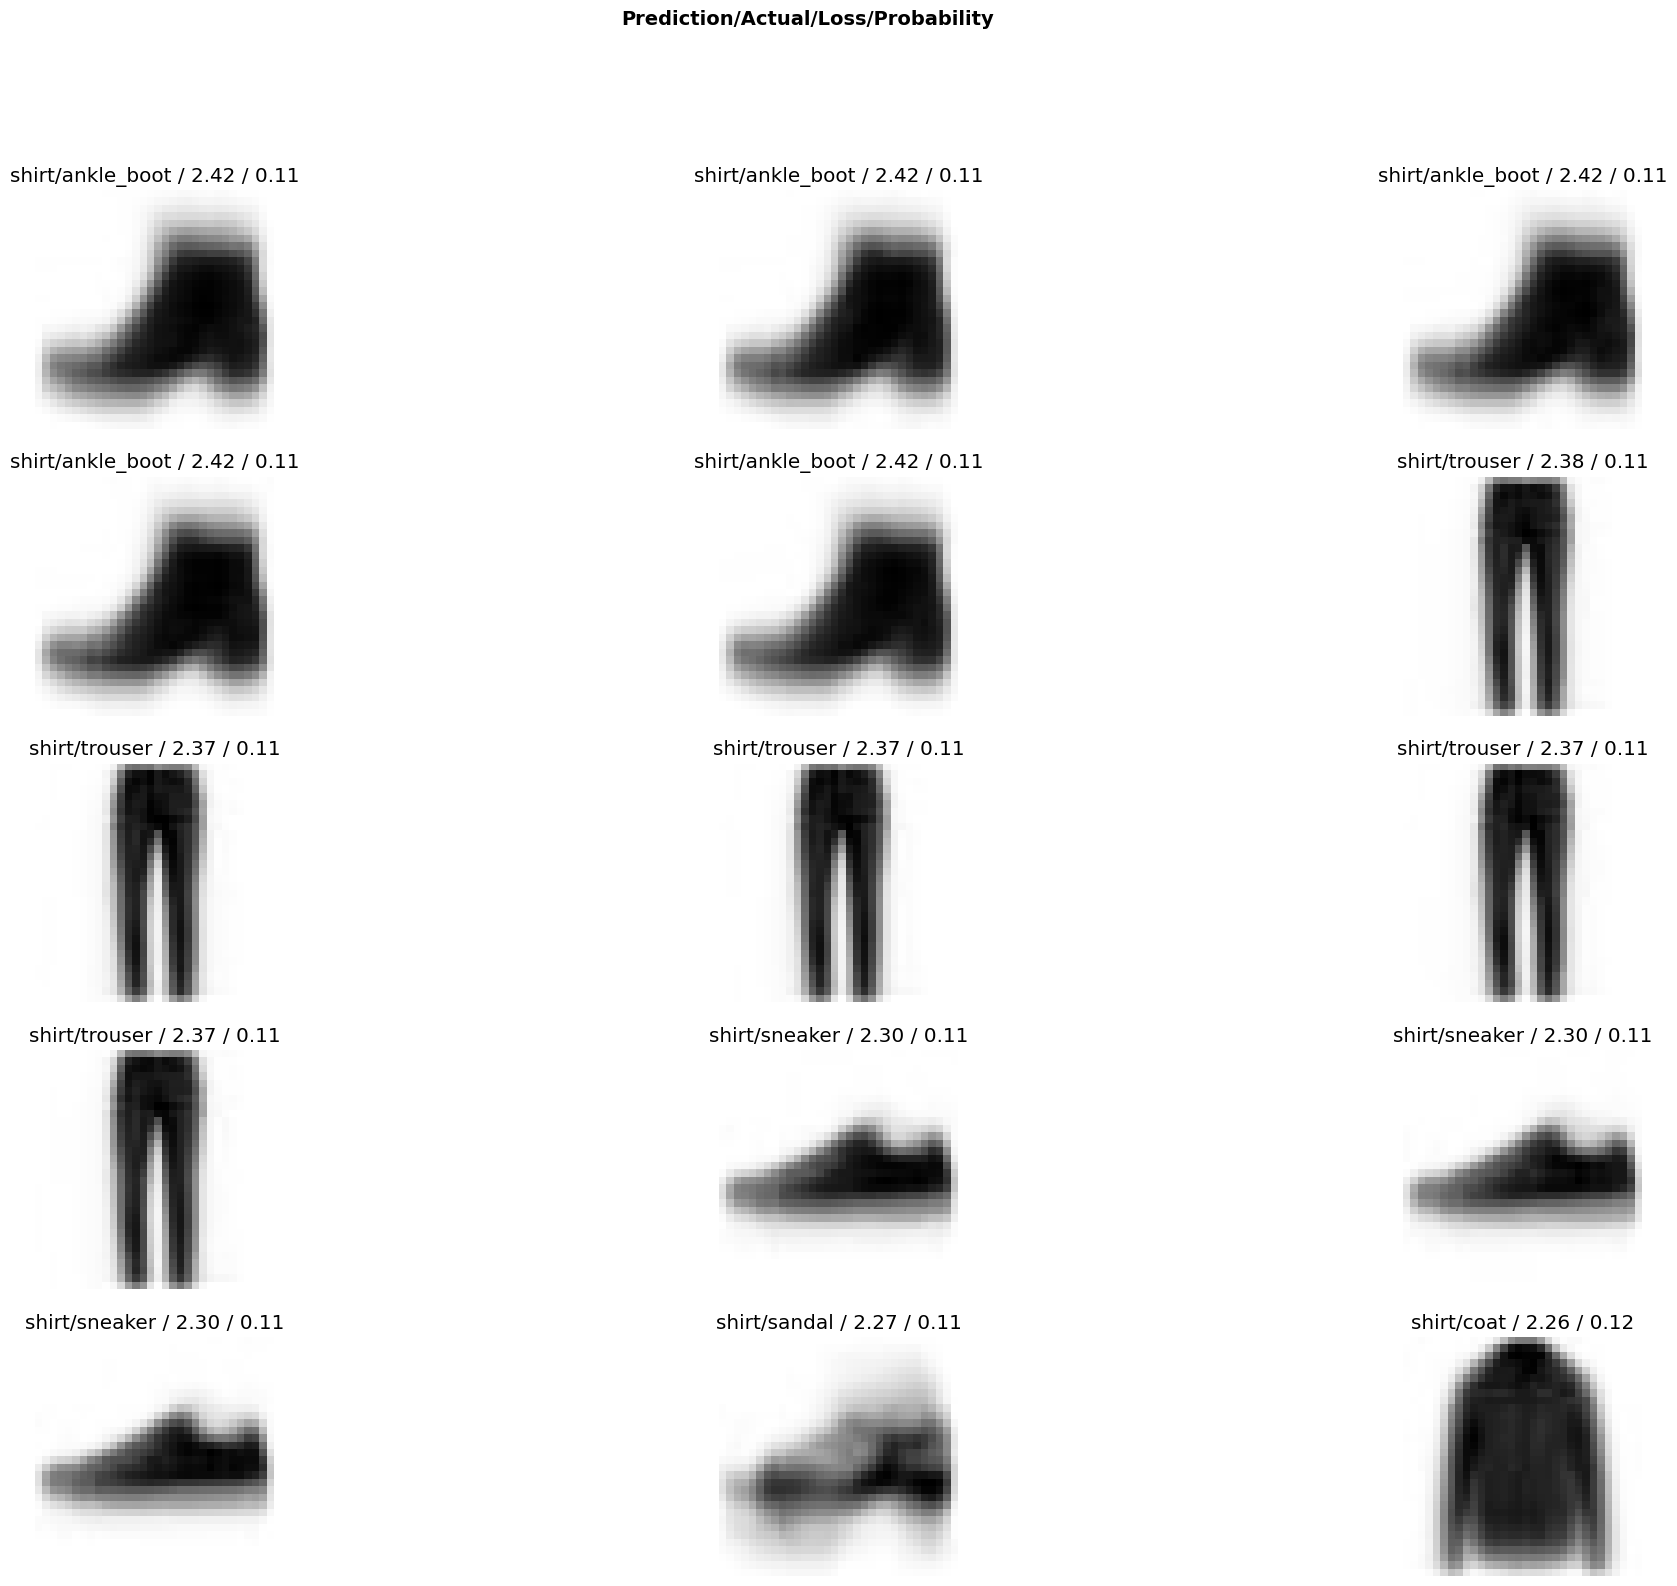

In [ ]:
interp.plot_top_losses(15, nrows=5, figsize=(25,18))

In [ ]:
learn.export('/content/drive/MyDrive/TFG/modelos/lenet_distilled_01.pkl')

### Distilled dataset - Lenet 001

In [ ]:
distilled_path = Path('/content/drive/MyDrive/TFG/image_distilled_fashion_mnist_001')

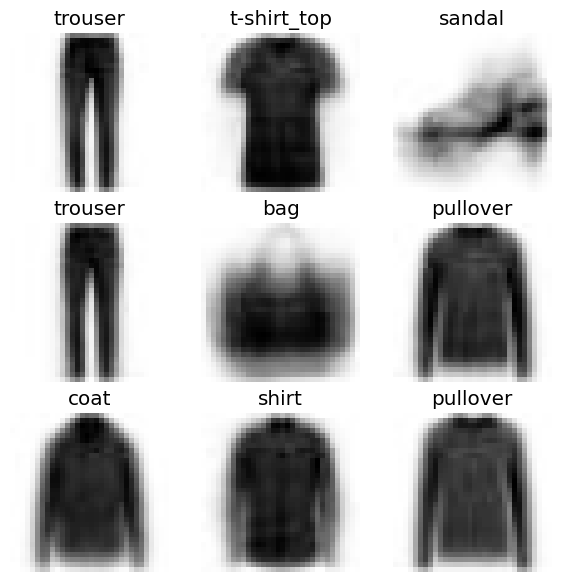

In [ ]:
# Crear los DataLoaders
blocks = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(32),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

# Crear los DataLoaders
dls_dest = blocks.dataloaders(distilled_path/'train', bs=64)
# dls_dest = blocks.dataloaders(distilled_path/'train', bs=128)
# dls_dest = blocks.dataloaders(distilled_path/'train', bs=256)

# Mostrar una muestra de las imágenes para verificar la correcta organización
dls_dest.show_batch(max_n=9, figsize=(7,7))


In [ ]:
# Obtener el número total de imágenes
num_train = len(dls_dest.train_ds)
num_valid = len(dls_dest.valid_ds)

print(f"Número total de imágenes en entrenamiento: {num_train}")
print(f"Número total de imágenes en validación: {num_valid}")

# Obtener la distribución de clases
class_counts = dls_dest.train_ds.vocab  # Obtiene las clases
print("\nClases:", class_counts)

Número total de imágenes en entrenamiento: 800
Número total de imágenes en validación: 200

Clases: ['ankle_boot', 'bag', 'coat', 'dress', 'pullover', 'sandal', 'shirt', 'sneaker', 't-shirt_top', 'trouser']


In [ ]:
# Instanciar el modelo
model = LeNet(num_classes=10)
# Crear el objeto learn
learn = Learner(dls_dest, model, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, Recall(average='macro'), F1Score(average='macro')], cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3)])

In [ ]:
start_time = time.time()
learn.fit_one_cycle(30)
end_time = time.time()

print(f"\nTiempo de entrenamiento: {end_time - start_time:.2f} segundos")

epoch,train_loss,valid_loss,accuracy,recall_score,f1_score,time
0,2.297531,2.287605,0.090000,0.100000,0.019355,06:32
1,2.287197,2.261162,0.200000,0.214286,0.106838,00:03
2,2.262060,2.181084,0.225000,0.238095,0.129512,00:04
3,2.193108,1.854286,0.675000,0.684615,0.599139,00:04
4,1.985314,1.165521,0.615000,0.600000,0.486216,00:03
5,1.696777,0.757702,0.815000,0.800000,0.746377,00:03
6,1.419888,0.506128,1.000000,1.000000,1.000000,00:04
7,1.177838,0.371966,0.980000,0.975987,0.977768,00:03
8,0.970152,0.253275,0.995000,0.993750,0.994071,00:03
9,0.796183,0.185904,1.000000,1.000000,1.000000,00:04



Tiempo de entrenamiento: 507.97 segundos


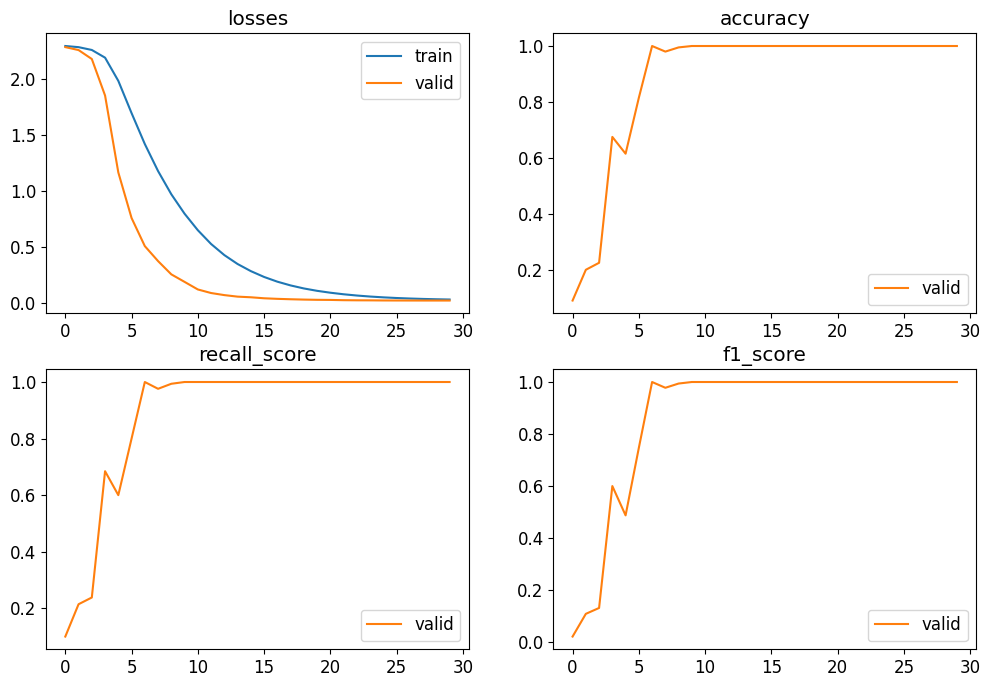

In [ ]:
learn.recorder.plot_metrics()

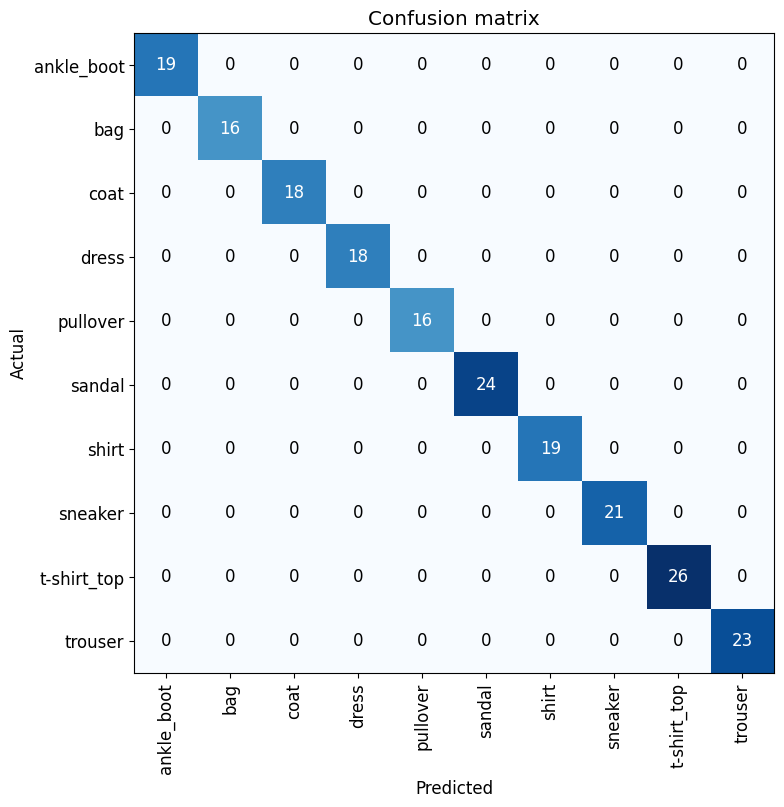

In [ ]:
#Creamos la interpretación de nuestro learner
interp = ClassificationInterpretation.from_learner(learn)

#Visualizamos la matriz de confusión
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

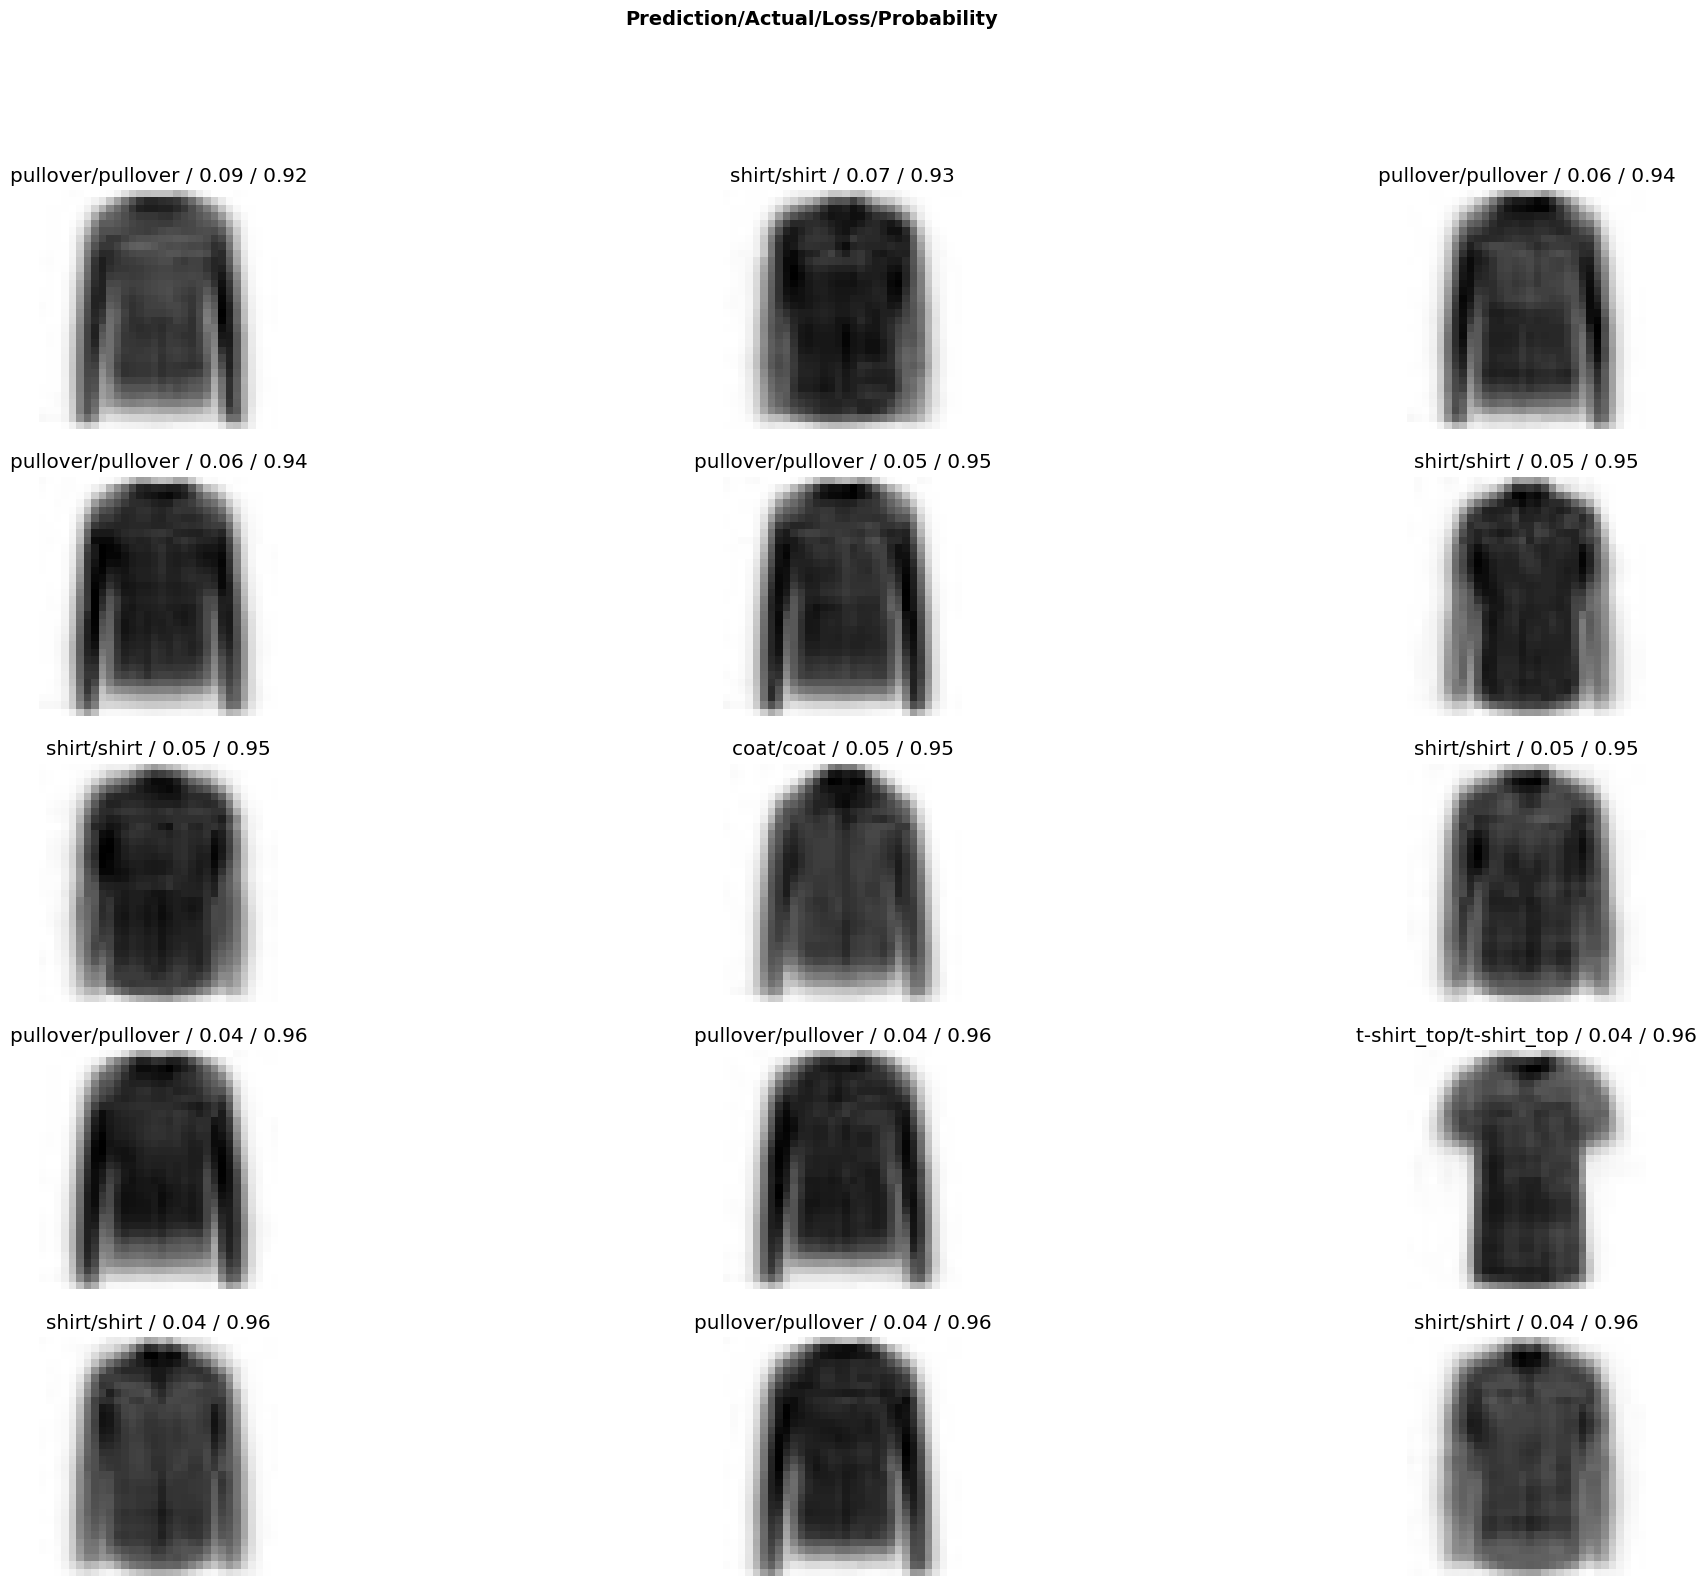

In [ ]:
interp.plot_top_losses(15, nrows=5, figsize=(25,18))

In [ ]:
learn.export('/content/drive/MyDrive/TFG/modelos/lenet_distilled_001.pkl')

### Distilled dataset - resnet18

In [ ]:
distilled_path = Path('/content/drive/MyDrive/TFG/image_distilled_fashion_mnist_01')

In [ ]:
# Crear los DataLoaders
blocks = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(224),
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

# Crear los DataLoaders
dls_dest = blocks.dataloaders(distilled_path/'train', bs=64)

# Mostrar una muestra de las imágenes para verificar la correcta organización
dls_dest.show_batch(max_n=9, figsize=(7,7))


In [ ]:
# Obtener el número total de imágenes
num_train = len(dls_dest.train_ds)
num_valid = len(dls_dest.valid_ds)

print(f"Número total de imágenes en entrenamiento: {num_train}")
print(f"Número total de imágenes en validación: {num_valid}")

# Obtener la distribución de clases
class_counts = dls_dest.train_ds.vocab  # Obtiene las clases
print("\nClases:", class_counts)

In [ ]:
learn = vision_learner(dls_dest, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, Recall(average='macro'), F1Score(average='macro')], pretrained=True, cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3)])
learn.fine_tune(10)

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
#Creamos la interpretación de nuestro learner
interp = ClassificationInterpretation.from_learner(learn)

#Visualizamos la matriz de confusión
interp.plot_confusion_matrix(figsize=(8,8), dpi=100)

In [ ]:
interp.plot_top_losses(15, nrows=5, figsize=(25,18))

In [ ]:
learn.export('/content/drive/MyDrive/TFG/modelos/resnet18_distilled_01.pkl')

## Build kmeans distillation

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

def mix_kmeans(image_paths):
    foregrounds = []

    for p in image_paths:
        # Cargar la imagen en escala de grises
        img = np.array(Image.open(str(p)).convert('L'))
        h, w = img.shape

        # Vectorizar la imagen: cada píxel es una muestra (1 valor de intensidad)
        pixels = img.reshape(-1, 1)

        # Aplicar KMeans con k=2 para segmentar la imagen
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(pixels)

        # Determinar el cluster con menor cantidad de píxeles (asumido foreground)
        counts = np.bincount(labels)
        foreground_cluster = np.argmin(counts)

        # Crear la máscara binaria: 1 para foreground, 0 para fondo
        mask = (labels == foreground_cluster).astype(np.uint8).reshape(h, w)
        # Suavizar la máscara para evitar bordes abruptos
        mask = cv2.GaussianBlur(mask.astype(np.float32), (3, 3), 0)

        # Extraer la parte relevante de la imagen
        foreground = img.astype(np.float32) * mask
        foregrounds.append(foreground)

    # Combinar (promediar) todas las imágenes foreground para obtener la imagen final
    composite_foreground = np.mean(np.stack(foregrounds, axis=0), axis=0)
    composite_foreground = np.clip(composite_foreground, 0, 255).astype(np.uint8)

    return Image.fromarray(composite_foreground, mode="L")

In [ ]:
# Definir la ruta destino de nuestro dataset "destilado"
distilled_path = Path('/content/drive/MyDrive/TFG/image_kmeans_01')

# Crear el subset destilado de train
create_distilled_dataset(output_path, distilled_path, fraction= 0.1, mix_function = mix_kmeans)

In [ ]:
# Definir la ruta destino de nuestro dataset "destilado"
distilled_path = Path('/content/drive/MyDrive/TFG/image_kmeans_001')

# Crear el subset destilado de train
create_distilled_dataset(output_path, distilled_path, fraction= 0.01, mix_function = mix_kmeans)

# TEST

In [ ]:
learn = load_learner('/content/drive/MyDrive/TFG/modelos/lenet_original.pkl')

In [ ]:
test_block = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(32),
    splitter=IndexSplitter([])
)

test_dls = test_block.dataloaders(output_path/'test', bs=256)


In [ ]:
learn.remove_cb(EarlyStoppingCallback)

In [ ]:
loss, acc, recall, f1 = learn.validate(dl=test_dls.train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")

Loss: 0.30366307497024536
Accuracy: 0.8886218070983887
Recall (macro): 0.8886312047313231
F1 Score (macro): 0.888488684179736


### 001

In [ ]:
test_block = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(32),
    splitter=IndexSplitter([])
)

test_dls = test_block.dataloaders(output_path/'test', bs=64)


In [ ]:
learn = load_learner('/content/drive/MyDrive/TFG/modelos/lenet_distilled_001.pkl')
learn.remove_cb(EarlyStoppingCallback)

In [ ]:
loss, acc, recall, f1 = learn.validate(dl=test_dls.train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")

Loss: 1.8070539236068726
Accuracy: 0.5849359035491943
Recall (macro): 0.5848367767690373
F1 Score (macro): 0.5753512197098032


### 01

In [ ]:
learn = load_learner('/content/drive/MyDrive/TFG/modelos/lenet_distilled_01.pkl')
learn.remove_cb(EarlyStoppingCallback)

In [ ]:
loss, acc, recall, f1 = learn.validate(dl=test_dls.train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")

Loss: 2.2728562355041504
Accuracy: 0.15134215354919434
Recall (macro): 0.15125145185265426
F1 Score (macro): 0.07990139333221861
